# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [2]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 6.3.0
-- The CXX compiler identification is GNU 6.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python3 (found version "3.5.3") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.5m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/jisus/ftad/current/mn/mn-tps/metnum-tp2
-- Configuring done
-- Generating done
-- Bui

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version
import metnum


/home/jisus/ftad/current/mn/mn-tps/metnum-tp2/notebooks
Python 3.5.3


## Explorando los datos

In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [5]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [58]:
n=10000
df_train = df_train[:n]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [7]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((10000, 784), (10000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

In [8]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


SyntaxError: invalid syntax (<ipython-input-8-992adc66aba6>, line 5)

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [9]:
df_train["label"].value_counts(normalize=True)

1    0.1095
2    0.1045
7    0.1039
3    0.1009
6    0.1003
9    0.0995
0    0.0991
4    0.0967
8    0.0950
5    0.0906
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [12]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

#print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(5)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)


In [42]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


Accuracy: 0.79
CPU times: user 163 ms, sys: 4.84 ms, total: 168 ms
Wall time: 181 ms


In [37]:
#%load_ext jupyternotify
from IPython.display import Javascript
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import time

In [42]:
%%time
begin = 1
end = 11
step = 1

k = begin
ks = np.empty(0, dtype='d')
ac = np.empty(0, dtype='d')
tm = np.empty(0, dtype='d')
f1 = np.empty(0, dtype='d')

while k < end:
    start = time.perf_counter()
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    stop = time.perf_counter()
    ac_score = accuracy_score(y_val, y_pred)
    f1_sc = f1_score(y_val, y_pred, labels = [0,1,2,3,4,5,6,7,8,9], average='macro')  
    ac = np.append(ac, ac_score)
    f1 = np.append(f1, f1_sc)
    ks = np.append(ks, i)
    tm = np.append(tm, (stop-start)) # secs
    k += step

Javascript("new Notification('Cell Execution Has Finished')")

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 4min, sys: 992 ms, total: 4min 1s
Wall time: 4min 1s


<IPython.core.display.Javascript object>

In [53]:
#%%notify
print(tm)
print(ks)
print(ac)
print(f1)

[24.20079374 24.09352532 23.74190938 23.97598433 24.43023606 24.35268152
 24.03952037 24.14758549 24.1514428  24.10200562]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.86   0.8465 0.862  0.857  0.8625 0.857  0.8565 0.8545 0.854  0.8505]
[0.82713794 0.81124312 0.82622242 0.81942312 0.82399055 0.81790702
 0.81614797 0.81389473 0.81269769 0.80917835]


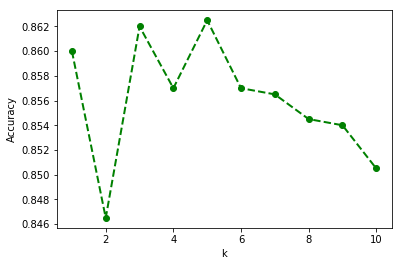

In [59]:
plt.plot(ks, ac, color='green', marker='o', linestyle='dashed',linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()
plt.savefig("kNN-tt-k_vs_acc-{}_{}_{}-n{}.png".format(begin, end, step, n)) # var-begin_end_step-n

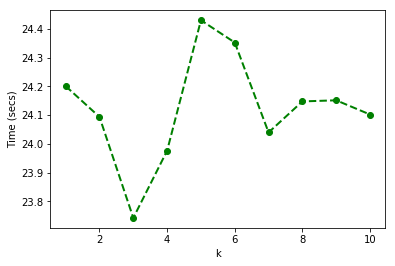

In [60]:
plt.plot(ks, tm, color='green', marker='o', linestyle='dashed', linewidth=2)
plt.ylabel('Time (secs)')
plt.xlabel('k')
plt.savefig("kNN-tt-k_vs_time-{}_{}_{}-n{}.png".format(begin, end, step, n)) # var-begin_end_step-n

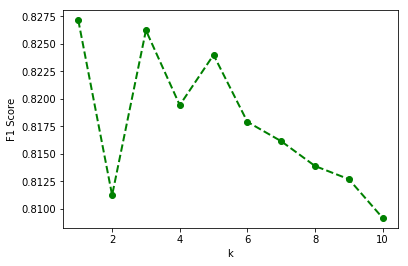

In [61]:
plt.plot(ks, f1, color='green', marker='o', linestyle='dashed', linewidth=2)
plt.ylabel('F1 Score')
plt.xlabel('k')
plt.grid()
plt.savefig("kNN-tt-k_vs_F1-{}_{}_{}-n{}.png".format(begin, end, step, n)) # var-begin_end_step-n